Comparison Methods Based on:

    *Simple, Interpretable and Stable Method for Detecting Words with Usage Change across Corpora*
    Hila Gonen, Ganesh Jawahar, Djamé Seddah, Yoav Goldberg https://www.aclweb.org/anthology/2020.acl-main.51/
    
They use an nearest neighbour word approach to identify the words that change the most.

__Intersection@k__ - for measuring stability:

- $intersection@k(r_1,r_2) = \frac{|r^k_1 \cap r^k_1|}{k}$

__Usage Change measure__

This uses an overlap between top $k$ words.

- $score^{k}(w) = -|NN^{k}_{1}(w) \cap NN^{k}_{2}(w)|$

Where $NN^{k}_{i}(w)$ is the set of k-nearest neighbors of word $w$ in space $i$. Authors use a value of $k=1000$.

__Implementation__

From the authors:

   > **Tokenization and Word Embeddings** We use
    300 dimensions word2vec vectors with 4 words
    context window. Further details of embeddings
    algorithm and tokenization are available in the appendix.
    
  > **Vocabulary and Filtering** We perform
    frequency-based filtering of the vocabulary,
    removing stop words (the most frequent 200 words
    for each corpus, as well as English stop words
    as defined in nltk
    ), as well as low frequency
    words (we discard the 20% least frequent words
    in each corpus, and require a minimum of 200
    occurrences).
    
  > Notably, we do not perform any other form of
    filtering, and keep proper-nouns and person-names
    intact.
    We consider neighbors having a raw frequency
    greater than 100 and identify 1000 such nearest
    neighbors (k =1000) to perform the intersection.

In [142]:
%load_ext autoreload
%autoreload 2
from compare_tools.configuration import wem_loader # a utility for changing my root dir when using gensim.api
from motes_corpus import modeling
import spacy
import pandas as pd

In [605]:
with open('/data/motes/all_weighted_1_model_include_vocab.txt', mode='r') as f:
    vocab_include_list = f.read().strip().split('\n')
    vocab_include_list = [x for x in vocab_include_list if modeling.word_stopping(x)]
    vocab_include_list = [x for x in vocab_include_list if len(x) > 2]
    
names = pd.read_csv('data/baby_names.csv').name.str.lower()
vocab_list_wo_names = list(set(vocab_include_list).difference(names))
len(vocab_include_list), len(vocab_list_wo_names)

(27228, 23170)

## Full Model compared to EN Wiki

In [635]:
mc = modeling.ModelCompare('/data/motes/models/all_combined_2_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv',
                  include_list=vocab_include_list)
scores = mc.scores(break_at=10000)
scores.sort_values().head(20)

bucks               0.023
lula                0.029
affirmative         0.032
nah                 0.033
corrections         0.035
yah                 0.035
responsibilities    0.037
skipper             0.038
tally               0.050
rein                0.050
toughest            0.051
sparks              0.052
sec                 0.057
rescuers            0.057
ing                 0.057
trailed             0.058
dax                 0.059
woo                 0.060
booming             0.060
looming             0.061
dtype: float64

In [862]:
mc = modeling.ModelCompare('/data/motes/models/all_weighted_3_model_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv',
                  include_list=vocab_include_list)

In [900]:
scores = mc.scores(break_at=100000)
scores.iloc[:10000].sort_values().head(20)

bucks               0.021
lula                0.029
responsibilities    0.032
nah                 0.033
affirmative         0.035
skipper             0.036
corrections         0.037
yah                 0.038
umbrella            0.046
watchdog            0.047
booming             0.047
sparks              0.049
birdie              0.050
ing                 0.050
tally               0.050
sec                 0.055
woo                 0.061
fortunately         0.062
specter             0.063
pose                0.064
dtype: float64

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:ylabel='Nearest Neighbor Intersect Score'>

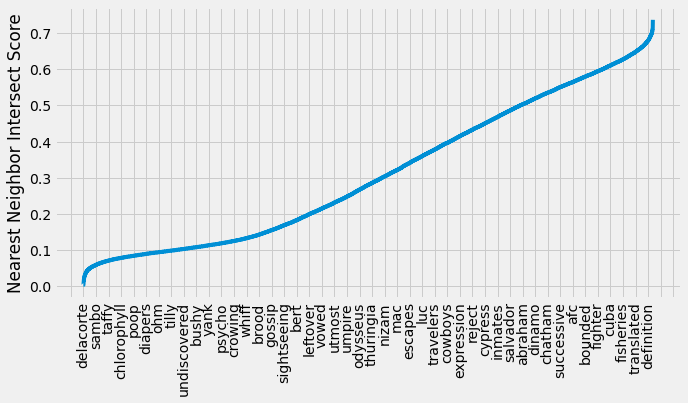

In [600]:
sorted_scores = scores.sort_values()
fig = plt.figure(figsize=(10,5))
ax = sorted_scores.plot(rot=90)
ax.set_ylabel('Nearest Neighbor Intersect Score')
start, end = ax.get_xlim()
step_size = 600


r = np.arange(-step_size, end, step_size)
l = []
for n in r:
    if (n < 0) or (n > len(sorted_scores)):
        l.append('')
    else:
        l.append(sorted_scores.index[n])

ax.xaxis.set_ticks(r)
ax.set_xticklabels(l)
ax

In [886]:
a.iloc[-20:][-10:]

border          0.716
ethnic          0.717
industrial      0.718
election        0.718
services        0.720
organization    0.720
president       0.727
republic        0.729
asia            0.741
africa          0.744
dtype: float64

In [898]:
a = scores.iloc[:10000].sort_values(ascending=True)
qs = a[a < .1].sample(10).index.tolist()
tab = mc.compare_nns_display_table(qs, 10)
html = tab.to_html().replace("\\n","<br>")
display_html(html, raw=True)

,Nearest Neighbours
word,
umbrella,"GENERAL: organizations, organisation, organization, organisations, collective, associations, governmental, affiliated, unite, militantCHILD: dope, swaying, kraken, davie, quail, astounded, fetched, soapy, rushes, pluckedOVERLAPS: -"
separatist,"GENERAL: militant, nationalist, nationalists, socialists, pacifist, sympathies, movement, liberation, communistsCHILD: jedi, droid, anakin, warship, skywalker, infiltrated, defenses, liberate, grievousOVERLAPS: separatists"
packing,"GENERAL: grabbing, watered, microscopic, inward, confinement, carlyle, murderous, abstraction, disrupt, francoisCHILD: tangle, hugging, squeezed, shave, bags, stuffed, moaning, ought, biscuits, embarrassmentOVERLAPS: -"
scrap,"GENERAL: disposed, sunk, sold, tender, recycling, shipyard, stricken, ship, repairs, vesselCHILD: junk, pile, metal, salvage, piece, clinging, yard, jimbo, babe, awhileOVERLAPS: -"
bust,"GENERAL: statue, marble, statues, mural, sculpture, portrait, plaque, erected, monumental, louvreCHILD: doors, stall, perched, shake, upside, swinging, ought, handle, lights, bootyOVERLAPS: -"
tee,"GENERAL: bottoms, foreigner, blondie, bubba, sophomore, mei, countdown, knock, geri, exaggerationCHILD: believable, hee, ewe, shirt, wah, tra, cressida, admirer, timmy, amoOVERLAPS: -"
hopefully,"GENERAL: scorn, acne, hurting, unbearable, bouncy, gutter, shadowed, shriek, hamper, turCHILD: going, challenging, discuss, way, hope, alright, walking, expect, think, ableOVERLAPS: -"
dire,"GENERAL: tread, riff, softer, sooner, oft, unnoticed, nasty, polluted, consequencesCHILD: qui, minden, cosa, woodsman, eek, hombre, fiddling, pas, plannerOVERLAPS: straits"
responsibilities,"GENERAL: ska, outta, rancid, pavement, shakin, clamped, indie, merrily, sewn, punkCHILD: deodorant, nacho, visa, telltale, sinker, sufferings, muffler, shipmates, aline, amiablyOVERLAPS: -"


In [899]:
from IPython.display import display_html
tab = mc.compare_nns_display_table(['bucks', 'lula', 'affirmative', 'batch', 'bust',
                                    'fantastic', 'anxious', 'foul', 'cool'], 15)
html= tab.to_html().replace('\\n', '<br>')
display_html(html, raw=True)
with pd.option_context("max_colwidth", 1000):
    print(tab.to_latex().replace(r'\textbackslash n', '\\\\ \n & '))

,Nearest Neighbours
word,
bucks,"GENERAL: milwaukee, colts, braves, browns, knicks, phillies, royals, northampton, suns, bulls, panthers, ers, pittsburgh, akron, bruinsCHILD: dollars, cents, owe, worth, apiece, pay, thousand, pounds, paid, tickets, ransom, allowance, wad, seventy, costingOVERLAPS: -"
lula,"GENERAL: silva, joaquim, filho, santos, campos, ernesto, estrada, presidente, joão, augusto, pinto, vargas, paulo, justoCHILD: vasco, rabid, tucked, woke, megahertz, dicey, crept, mum, abby, grumble, silky, bjorn, butterflies, shovelingOVERLAPS: luiz"
affirmative,"GENERAL: nudity, discrimination, fairness, imperative, liar, questionable, abort, prejudice, proposition, hibernation, arguing, begs, denial, unfair, advocatesCHILD: ruff, evasive, overload, lint, haw, activate, override, sensors, donatello, homing, ominous, detected, awaiting, shashi, watchtowerOVERLAPS: -"
batch,"GENERAL: prototypes, deliveries, shipped, prototype, stored, locomotives, initial, processing, process, commence, ready, delivered, assembling, manually, configurationCHILD: buttered, chocolate, cookies, sliced, potatoes, bacon, decided, dropped, butter, toast, chips, moustache, fertilizer, biscuits, scentedOVERLAPS: -"
bust,"GENERAL: statue, marble, mural, sculpture, portrait, plaque, erected, monumental, louvre, unveiled, engraved, sculptor, monument, bronzeCHILD: doors, stall, perched, shake, upside, swinging, ought, handle, lights, booty, blow, enjoying, swell, rumpOVERLAPS: statues"
fantastic,"GENERAL: marvel, avengers, kirby, strange, hulk, weird, mister, stan, spider, superhero, warlock, beastsCHILD: wonderful, look, happen, great, awesome, let, exciting, swell, friends, job, surprising, seeingOVERLAPS: amazing, incredible, superheroes"
anxious,"GENERAL: uncomfortable, frustrated, unhappy, eager, impatient, preoccupied, wanting, worried, compelled, unwilling, admire, confident, hopeless, distressed, embarrassedCHILD: scarcely, exclaimed, gravely, puzzled, hastily, impatiently, remarked, glance, uneasy, evidently, inquired, accustomed, nearer, replied, feelingOVERLAPS: -"
foul,"GENERAL: batter, touching, outfield, throws, thrown, throw, bounced, touches, hitting, kick, throwing, balls, referee, intentionallyCHILD: odor, utterly, suppose, deny, commands, poking, toss, happily, bite, cursed, dare, beasts, upside, pluckedOVERLAPS: ball"
cool,"GENERAL: warm, winters, summers, humid, mild, damp, hot, sunny, rainy, wet, cold, climates, temperatures, cooler, warmerCHILD: awesome, yeah, guys, looks, pretty, wow, nice, guess, sure, fun, mean, huh, guy, funny, actuallyOVERLAPS: -"


\begin{tabular}{ll}
\toprule
{} &                                                                                                                                                                                                                                                                                                                              Nearest Neighbours \\
word        &                                                                                                                                                                                                                                                                                                                                                 \\
\midrule
bucks       &                                                                 GENERAL: milwaukee, colts, braves, browns, knicks, phillies, royals, northampton, suns, bulls, panthers, ers, pittsburgh, akron, bruins\\ 
 & CHILD: dollars, cents, owe, worth, apiece, pa

## Sub-corpora

### Youtube

In [602]:
mc = modeling.ModelCompare('/data/motes/models/yt_w_en_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv',
                  include_list=vocab_include_list)
yt_scores = mc.scores(break_at=10000)

In [790]:
yt_scores_cleaned = yt_scores[~yt_scores.index.isin(names[:5000])].iloc[:10000].sort_values(ascending=True)
html = mc.compare_nns_display_table(yt_scores_cleaned.iloc[:10].index.tolist(), 20).to_html().replace("\\n","<br>")
display_html(html, raw=True)

,Nearest Neighbours
word,
affirmative,"GENERAL: nudity, discrimination, fairness, imperative, liar, questionable, abort, prejudice, proposition, hibernation, arguing, begs, denial, unfair, advocates, racism, harassment, loophole, racist, criticizeCHILD: holographic, asap, heatwave, vert, activating, siphon, martians, shutting, treadmill, bot, manta, activate, makeover, intruder, vroom, bots, gettin, shashi, doody, hiccupsOVERLAPS: -"
umbrella,"GENERAL: organizations, organisation, organization, organisations, collective, associations, governmental, affiliated, unite, militant, groups, advocacy, advisory, promotes, broader, entities, loose, multinational, corporations, entityCHILD: raining, sunshine, plucked, tee, rain, pouring, windy, balloons, lemon, blossoms, bubbling, triumphant, baking, alas, shirt, falling, sour, sweater, bake, onionOVERLAPS: -"
ing,"GENERAL: eng, cheng, suffix, tai, ying, coo, huang, hua, ching, dai, verb, wong, ling, chen, singular, chang, chung, lim, ningCHILD: squire, way, reckon, retorted, puzzled, idiot, puff, dim, pounded, cautiously, know, scratched, bor, saddle, ragged, swinging, slumped, evidently, trailedOVERLAPS: wen"
tally,"GENERAL: scoring, score, goals, scored, conceded, scorers, podium, opponent, goal, scores, qualifying, matches, finishing, winning, loser, outcome, tying, votes, results, standingsCHILD: shay, cat, wink, nature, pals, willa, shave, poke, swallowed, shoulder, woke, knit, porcupine, campsite, peg, jumped, elinor, wondered, ledge, noticedOVERLAPS: -"
sparks,"GENERAL: reno, angeles, los, neal, grayson, anaheim, tyler, angels, parker, hayward, mike, lakers, phoenix, suns, flames, sacramento, tracy, booked, ron, blazeCHILD: blur, crew, hero, triumphant, lively, thumping, bucket, cracking, lights, dias, chickens, heroic, candles, swirling, whistles, flashlight, rescue, whistling, burglar, thunderOVERLAPS: -"
grounded,"GENERAL: jammed, justification, planes, incapable, justified, safely, disposed, repaired, intentionally, overhauled, piloting, abandoning, shipwrecked, aircraft, touched, faulty, proving, airbus, airplanes, crewsCHILD: detention, expelled, cozy, serenity, suspended, forever, weeks, freak, gems, shaved, copying, scared, chores, trouble, doomed, paying, upstairs, lightest, quit, trillionOVERLAPS: -"
woo,"GENERAL: choi, kwon, schubert, yong, sonata, hee, hyun, tae, kim, wong, chung, concerto, hess, jung, beethoven, violin, mozart, brahms, piano, jinCHILD: hoo, yay, ooh, whoa, cheering, yeah, cheers, ready, wah, laughing, hey, awesome, ahh, fun, xavier, ooo, ramp, yah, huh, yeeOVERLAPS: -"
soared,"GENERAL: dwindled, declining, earnings, steadily, rents, prices, profits, dramatically, risen, revenues, shrinking, booming, decreased, billions, unemployment, amounted, wages, exceeded, surgedCHILD: hummed, puffed, ventured, striding, dismay, thumped, swelled, boomed, clattered, shiver, bolted, murmur, dipped, dimly, sprawled, reared, flurry, heaved, flickeringOVERLAPS: shrank"
rein,"GENERAL: auditioning, sincere, deferred, prayed, mistook, tat, anjou, hover, grotesque, browse, messiah, taker, stressful, sermons, ebony, pint, biel, nbs, tous, immovableCHILD: frock, smirk, hollered, tucking, soult, dozing, blackfeet, zipped, darted, trampoline, shacks, brows, gulped, drenched, jocks, hotshot, loveliest, truthfully, passionately, wailedOVERLAPS: -"


### Shows

In [631]:
mc = modeling.ModelCompare('/data/motes/models/show_w_en_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv',
                  include_list=vocab_include_list)
show_scores = mc.scores(break_at=10000)

In [629]:
show_scores_cleaned = show_scores[~show_scores.index.isin(names[:5000])].iloc[:10000].sort_values(ascending=True)
html = mc.compare_nns_display_table(show_scores_cleaned.iloc[:10].index.tolist(), 10).to_html().replace("\\n","<br>")
display_html(html, raw=True)

,Nearest Neighbours
word,
briefing,"GENERAL: viola, haunting, coordination, dubai, urn, garcia, soloist, stool, scanner, courtiersCHILD: bailed, mingle, seesaw, fetching, haystack, endanger, scarier, derision, scant, jocksOVERLAPS: -"
assailants,"GENERAL: astray, marcie, stings, saarland, jog, foolhardy, conjure, bumping, elspeth, smartingCHILD: skirmish, suffice, alacrity, stumble, frighten, prowl, lovingly, appa, arjun, clickedOVERLAPS: -"
trailed,"GENERAL: grieved, chafed, tablecloth, incredulous, eyeballs, joyously, quieted, sputtered, brooms, wagsCHILD: numb, chewed, muffled, gripping, tasted, cautiously, politely, clinging, howling, remindOVERLAPS: -"
responsibilities,"GENERAL: ska, outta, rancid, pavement, shakin, clamped, indie, merrily, sewn, punkCHILD: disappoint, impudent, jumbled, weirdest, tardy, raspy, scrawled, sifted, haunts, whizzedOVERLAPS: -"
shaky,"GENERAL: cripple, immovable, roadkill, foiled, toi, stifling, goosebumps, stedman, clot, sneakingCHILD: heaved, anytime, pinched, smack, spat, squeezing, joking, darkened, surprises, hookedOVERLAPS: -"
tumbled,"GENERAL: trickled, appa, elation, impolite, friendless, adios, sipho, bragged, snugly, baggedCHILD: icy, ankles, scent, outstretched, brightly, flipped, chattering, shivered, cursing, wildlyOVERLAPS: -"
spaniard,"GENERAL: gonzalo, gómez, gonzález, esteban, ángel, alejandro, peña, lópez, delgado, alonsoCHILD: mose, spurt, chases, hollows, rutledge, longed, ponderous, powerpuff, idly, exertionsOVERLAPS: -"
rescuers,"GENERAL: eagerly, vanquished, vengeful, haste, bewildered, amuse, torches, hurled, lawless, boatmenCHILD: rattler, swum, whooped, rafe, brainy, indulge, indulging, stupidity, dismount, troublemakerOVERLAPS: -"
rein,"GENERAL: auditioning, sincere, deferred, prayed, mistook, tat, anjou, hover, grotesque, browseCHILD: weep, wondrous, solemnly, hearty, surly, quickened, senseless, bridle, growl, poniesOVERLAPS: -"


### Books

In [624]:
mc = modeling.ModelCompare('/data/motes/models/books_w_en_100k.kv',
                           '/data/motes/models/enwiki_317k_100k.kv',
                           include_list=vocab_include_list)
# Earlier cut-off because data is noisier
book_scores = mc.scores(break_at=10000)

In [859]:
book_scores_cleaned = book_scores[~book_scores.index.isin(names[:5000])].sort_values(ascending=True)
html = mc.compare_nns_display_table(book_scores_cleaned.iloc[:10].index.tolist(), 10).to_html().replace("\\n","<br>")
display_html(html, raw=True)

,Nearest Neighbours
word,
briefing,"GENERAL: viola, haunting, coordination, dubai, urn, garcia, soloist, stool, scanner, courtiersCHILD: sidewalk, defy, exchanging, hurriedly, searchlight, quadrant, assembling, braces, provocation, proceedingsOVERLAPS: -"
assailants,"GENERAL: astray, marcie, stings, saarland, jog, foolhardy, conjure, bumping, elspeth, smartingCHILD: treasured, calmly, misfortunes, plunging, rips, pursuer, mangled, sew, unconcerned, swivelOVERLAPS: -"
trailed,"GENERAL: grieved, chafed, tablecloth, incredulous, eyeballs, joyously, quieted, sputtered, brooms, wagsCHILD: conceded, disappointing, berth, inning, losing, final, rematch, ensuing, playoffs, slippedOVERLAPS: -"
responsibilities,"GENERAL: ska, outta, rancid, pavement, shakin, clamped, indie, merrily, sewn, punkCHILD: terre, crushing, concentration, hardcover, michel, tecumseh, ravine, massif, large, warshipOVERLAPS: -"
shaky,"GENERAL: cripple, immovable, roadkill, foiled, toi, stifling, goosebumps, stedman, clot, sneakingCHILD: fosse, flattered, rioters, teamwork, spat, unforeseen, stared, hike, slack, indignantOVERLAPS: -"
tumbled,"GENERAL: trickled, appa, elation, impolite, friendless, adios, sipho, bragged, snugly, baggedCHILD: snag, flatten, roared, slicker, wrung, groped, spurt, twinkling, tugged, assuredlyOVERLAPS: -"
spaniard,"GENERAL: gonzalo, gómez, gonzález, esteban, ángel, alejandro, peña, lópez, delgado, alonsoCHILD: revolted, spaniards, labourers, deported, massacred, spanish, slaughtered, laborers, enforced, torturedOVERLAPS: -"
rescuers,"GENERAL: eagerly, vanquished, vengeful, haste, bewildered, amuse, torches, hurled, lawless, boatmenCHILD: gotta, juana, fondness, darkened, usc, grandeur, improvise, maneuvers, nailed, confrontOVERLAPS: -"
rein,"GENERAL: auditioning, sincere, deferred, prayed, mistook, tat, anjou, hover, grotesque, browseCHILD: risked, sacrificed, marines, battalion, infantry, regiment, platoon, wounded, grenade, marineOVERLAPS: -"


In [793]:
mc = modeling.ModelCompare('/data/motes/models/simple_wiki_w_en_100k.kv',
                           '/data/motes/models/enwiki_317k_100k.kv',
                           include_list=vocab_include_list)
# Earlier cut-off because data is noisier
wiki_scores = mc.scores(break_at=10000)

In [857]:
wiki_scores_cleaned = wiki_scores[~wiki_scores.index.isin(names[:5000])].iloc[:5000].sort_values(ascending=True)
html = mc.compare_nns_display_table(wiki_scores_cleaned.iloc[:10].index.tolist(), 10).to_html().replace("\\n","<br>")
display_html(html, raw=True)

,Nearest Neighbours
word,
blasts,"GENERAL: fugitives, dived, fannie, bumped, scipio, blackened, deluge, pounded, consternation, outrunCHILD: plowing, janitor, stamping, blackbird, attends, sharma, sarge, skateboard, capes, expandsOVERLAPS: -"
surged,"GENERAL: precipitous, slashed, racked, levelled, flurry, stumbled, regroup, resumes, pacify, rutCHILD: gangway, nicest, howls, fretting, indignantly, vexed, fiendish, trifling, tempers, shrugOVERLAPS: -"
slump,"GENERAL: alluded, ogre, tweet, ruining, bane, shredder, shouts, brace, stuffing, sisCHILD: exaggerating, snowstorm, stumble, jolting, munched, crumble, classy, ticks, scaring, coaxOVERLAPS: -"
hopefully,"GENERAL: scorn, acne, hurting, unbearable, bouncy, gutter, shadowed, shriek, hamper, turCHILD: expect, weep, assure, wipe, strive, deceive, deserve, wondering, exclaimed, oughtOVERLAPS: -"
hah,"GENERAL: wel, solicitude, turtleneck, keer, geraniums, squealed, brassy, clanged, cooped, whimperCHILD: hyun, tae, choi, yoo, kwon, hee, soo, jae, woo, rohOVERLAPS: -"
darfur,"GENERAL: rwanda, somalia, eritrea, karabakh, separatists, yemen, superpower, nagorno, ploCHILD: lesbian, refugee, humanitarian, headland, advocacy, genocide, conflict, cocaine, preventionOVERLAPS: sudan"
tougher,"GENERAL: bluebird, lotta, barks, pounce, smoother, hotly, rehearse, songbird, jig, flawCHILD: suffice, softer, complain, resourceful, soften, irritated, stronger, flatter, tightened, cautiousOVERLAPS: -"
quake,"GENERAL: unreal, xbox, nes, rpg, arcade, playstation, gameplay, multiplayer, atari, doomCHILD: earthquake, nhc, mishap, grapple, engulfed, assailant, egbert, delaying, momentary, blackedOVERLAPS: -"
plunged,"GENERAL: vogue, endured, lest, dispersed, wanderer, yamamoto, delusion, stead, crusader, arroganceCHILD: renew, rascals, blisters, spices, marsha, bluffs, bundles, bains, groovy, contemptuouslyOVERLAPS: -"


In [846]:
top_scores = []
for x in [yt_scores, wiki_scores, show_scores, book_scores]:
    top_scores += x.sort_values().iloc[:10].index.tolist()
len(top_scores), len(set(top_scores))

(40, 28)

In [847]:
pd.Series(top_scores).duplicated(keep=False).value_counts()

True     23
False    17
dtype: int64

In [852]:
print("Wiki scores:", ", ".join(wiki_scores_cleaned.iloc[:10].index.tolist()))
print("\nYouTube scores:", ", ".join(yt_scores_cleaned.iloc[:10].index.tolist()))
print("\nShow scores:", ", ".join(show_scores_cleaned.iloc[:10].index.tolist()))
print("\nBook scores:", ", ".join(book_scores_cleaned.iloc[:10].index.tolist()))
print('-'*100)
print("Wiki scores:", ", ".join(wiki_scores.sort_values().iloc[:10].index.tolist()))
print("\nYouTube scores:", ", ".join(yt_scores.sort_values().iloc[:10].index.tolist()))
print("\nShow scores:", ", ".join(show_scores.sort_values().iloc[:10].index.tolist()))
print("\nBook scores:", ", ".join(book_scores.sort_values().iloc[:10].index.tolist()))

Wiki scores: rein, responsibilities, troubling, rah, slammed, shaky, fortunately, tighten, sidelines, mee

YouTube scores: affirmative, umbrella, ing, tally, sparks, grounded, woo, soared, rein, hint

Show scores: briefing, assailants, trailed, responsibilities, shaky, tumbled, spaniard, rescuers, rein, ying

Book scores: briefing, surged, hopefully, blasts, hah, tougher, chair, slump, sweeping, rebound
----------------------------------------------------------------------------------------------------
Wiki scores: rein, responsibilities, troubling, rah, dax, slammed, shaky, fortunately, mee, sidelines

YouTube scores: lula, affirmative, umbrella, xavier, ronald, ing, tally, sparks, grounded, omar

Show scores: lula, ronald, xavier, affirmative, omar, tally, grounded, umbrella, woo, responsibilities

Book scores: briefing, barney, assailants, trailed, responsibilities, shaky, tumbled, spaniard, rein, rescuers


## Model Analysis

Outside of comparison, how do the coocurrence matrices differ?

In [ ]:
import glob
from scipy import sparse
import numpy as np
from gensim.corpora import dictionary

model_dict = dictionary.Dictionary.load_from_text('/data/motes/gigaword_300_dict.txt')

margins = dict()
props = dict()
odds = dict()

## Distributions

In [263]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [289]:
margin_df.values[margin_df.values == 0] = np.nan

<AxesSubplot:ylabel='Density'>

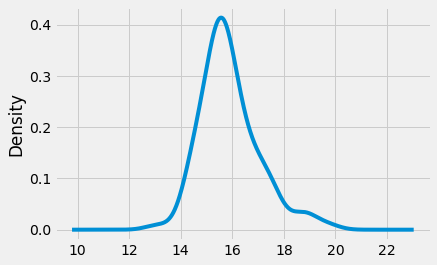

In [290]:
margin_df['enwiki_cooc_317k_raw'].dropna().iloc[:100].apply(np.log).plot(kind='density')

In [294]:
margin_df

,all_weighted_2_model,enwiki_cooc_317k_raw,simple_wiki_w_en,yt_w_en,books_w_en
the,2.188596e+09,3.669272e+08,6.916161e+08,9.608243e+08,1.454553e+09
",",2.386833e+09,NaN,NaN,7.749258e+08,1.347265e+09
.,3.164189e+09,NaN,NaN,9.834546e+08,1.749774e+09
of,8.719122e+08,1.914995e+08,3.584130e+08,4.136755e+08,5.732686e+08
to,1.154932e+09,1.037967e+08,1.864824e+08,5.709733e+08,6.487614e+08
...,...,...,...,...,...
chanty,2.504636e+03,2.243810e+02,2.162810e+02,2.162810e+02,2.758177e+02
kronik,6.591559e+02,2.090000e+02,1.116412e+03,2.019000e+02,2.019000e+02
rolonda,1.206000e+02,1.293000e+02,1.206000e+02,1.206000e+02,1.206000e+02
zsombor,2.500000e+01,2.750000e+01,2.500000e+01,2.500000e+01,2.500000e+01


In [297]:
import seaborn as sns

<AxesSubplot:xlabel='variable', ylabel='value'>

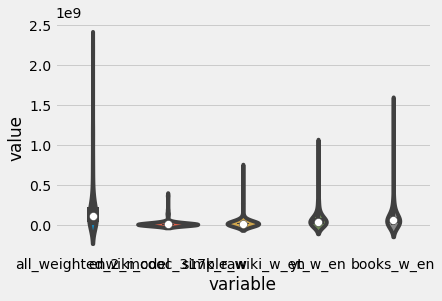

In [306]:
b = pd.melt(margin_df.dropna().iloc[:100])
sns.violinplot(x=b['variable'], y=b['value'])

<AxesSubplot:ylabel='Density'>

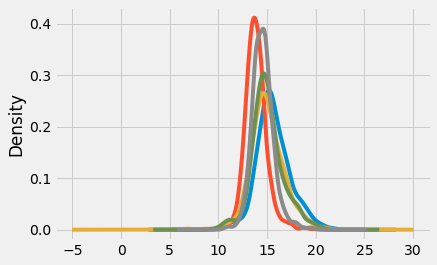

In [296]:
ax = margin_df['all_weighted_2_model'].dropna().iloc[:1000].apply(np.log).plot(kind='density')
margin_df['enwiki_cooc_317k_raw'].dropna().iloc[:1000].apply(np.log).plot(kind='density', ax=ax)
margin_df['books_w_en'].dropna().iloc[:1000].apply(np.log).plot(kind='density', ax=ax)
margin_df['yt_w_en'].dropna().iloc[:1000].apply(np.log).plot(kind='density', ax=ax)
margin_df['simple_wiki_w_en'].dropna().iloc[:1000].apply(np.log).plot(kind='density', ax=ax)

### Log Odds Ratio

In [637]:
cooc_names = ['all_weighted_2_model', 'all_weighted_3_model',
 'enwiki_cooc_317k_raw', 'simple_wiki_w_en', 'yt_w_en', 'books_w_en', 'shows_w_en']

In [644]:
for cooc_name in cooc_names[5:]:
    cooc = sparse.load_npz('/data/motes/coocs/{}.npz'.format(cooc_name))
    margins[cooc_name] = np.array(cooc.sum(0))[0]

In [645]:
for cooc_name in cooc_names:
    props[cooc_name] = margins[cooc_name] / margins[cooc_name].sum()
    odds[cooc_name] = props[cooc_name] / (1-props[cooc_name])

In [646]:
log_or = {}
baseline = 'enwiki_cooc_317k_raw'
for cooc_name in cooc_names:
    if cooc_name == baseline:
        continue
    odds_ratio = (odds[cooc_name] / odds[baseline])
    odds_ratio[(odds_ratio == np.inf) | (odds_ratio == 0)] = np.nan
    log_or[cooc_name] = pd.Series(np.log(odds_ratio), index=model_dict.values())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [1219]:
a = pd.DataFrame(log_or)
a = a[~a.index.isin(spacy.lang.en.stop_words.STOP_WORDS)]
a = a.iloc[:20000]

In [1220]:
a.mean(1).sort_values(ascending=False).head(10)

okay     5.321900
huh      4.929662
yeah     4.637706
mom      4.000776
dad      3.764123
hey      3.679472
sorry    3.603532
oh       3.536600
uh       3.519840
maybe    3.484823
dtype: float64

In [1244]:
top_words_total = []
for col in a.columns[4:]:
    print(col)
    top_words_col = a[col].sort_values(ascending=False).iloc[:100].index.tolist()
    print(", ".join(top_words_col[:15]), '\n')
    if 'all' not in col:
        top_words_total += top_words_col

books_w_en
smiled, shrugged, okay, mom, laughed, staring, leaned, dad, shook, yelled, hugged, cried, wondered, huh, wo 

shows_w_en
huh, okay, yeah, uh, hey, sorry, oh, guys, duh, um, wow, nah, awesome, maybe, thank 



In [1245]:
# percent of words seen in other lists
c =pd.Series(top_words_total).duplicated(keep=False).value_counts()
c/c.sum()

False    0.72
True     0.28
dtype: float64

In [776]:
max_count = len(top_words_total)
min_count = len(top_words_total)/4
1 - (len(set(top_words_total)) - min_count)/(max_count-min_count)

0.45699999999999996

## Clustering

Seeing if there's a pattern among the high-shift words.

In [914]:
mc = modeling.ModelCompare('/data/motes/models/all_weighted_3_model_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv',
                  include_list=vocab_include_list)
scores = mc.scores(break_at=10000)
sorted_scores = scores[~scores.index.isin(names[:5000])].sort_values()

In [917]:
focus = sorted_scores[sorted_scores <= .2]
len(focus)

552

In [923]:
vecs = np.vstack([mc.target.get_vector(word) for word in focus.index])

In [921]:
vecs.shape

(10, 300)

In [924]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [937]:
pca = PCA(n_components=2).fit(mc.target.vectors_norm) #Fit separately for easier transforming later
all_reduced = pca.transform(mc.target.vectors_norm)

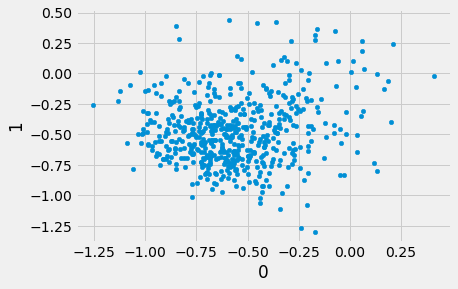

<AxesSubplot:xlabel='0', ylabel='1'>

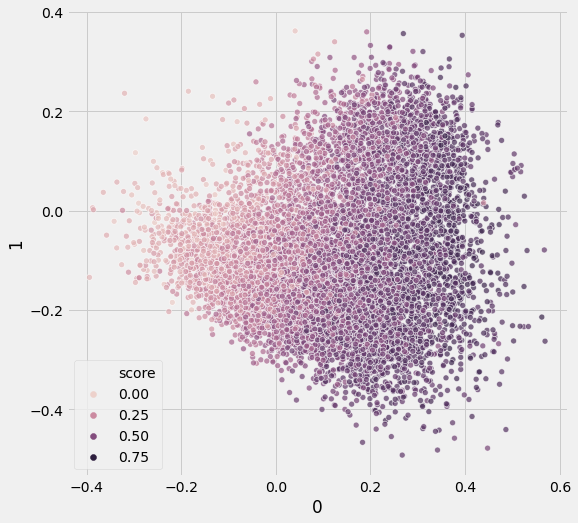

In [961]:
import seaborn as sns
coords = pd.DataFrame(all_reduced, index=vocab_include_list)
coords['score'] = pd.Series(scores)
small = coords.iloc[::1]
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=small[0], y=small[1], hue=small['score'], legend='brief', alpha=.7)

In [979]:
coords = pd.DataFrame(pca.transform(vecs), index=focus.index)
coords['score'] = focus

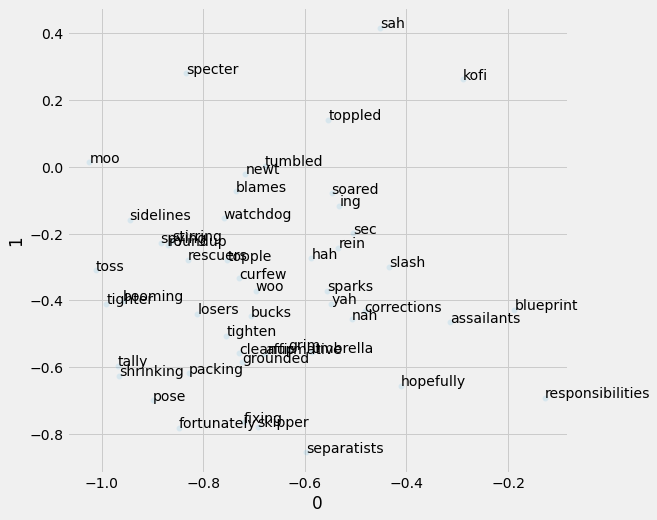

In [985]:
small = coords.iloc[:50:1]
fig = plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=small[0], y=small[1], legend='brief', alpha=.1)
for word, data in small.iloc[::].iterrows():
    ax.text(data[0], data[1], word)

In [1043]:
for word, data in coords.query('model=="baseline"').sample(10).iterrows():

,0,1,model
inhabit,0.160640,-0.693795,baseline
expansion,0.991882,-1.286513,baseline
poor,0.027196,-1.179805,baseline
conference,1.207242,-0.689359,baseline
meant,0.022028,-1.368296,baseline
continue,0.322772,-1.603088,baseline
defend,-0.001522,-0.915076,baseline
pre,1.008456,-1.357640,baseline
coming,-0.245968,-1.243347,baseline
extreme,0.271718,-1.244784,baseline


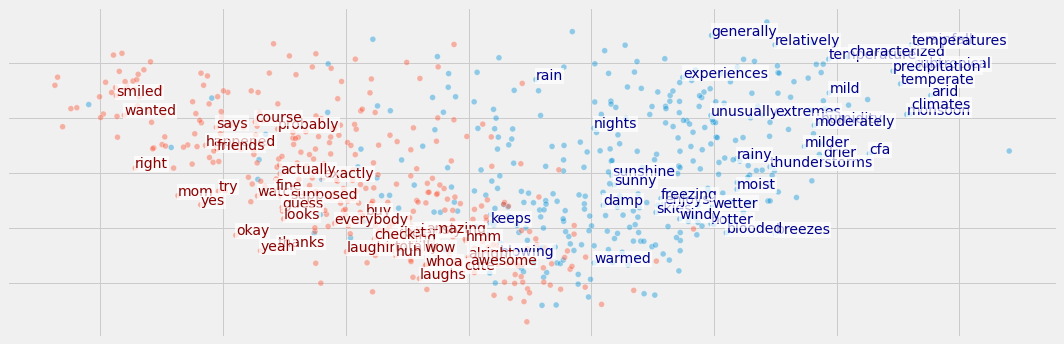

In [1218]:
q = 'cool' #sorted_scores.head(400).sample().index[0]
fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharey=False)
fig.tight_layout()

q_vec = mc.target.get_vector(q)
q_coord = pca.transform([q_vec])[0]

all_words = mc.compare_nns(q, 500)
vecs = np.vstack([mc.target.get_vector(word) for word in all_words['general']+all_words['child']+all_words['overlap']]) 

#pca_coords = pca.transform(vecs)
pca_coords = PCA(n_components=2).fit_transform(vecs)

coords = pd.DataFrame(pca_coords, index=all_words['general']+all_words['child']+all_words['overlap'])
coords['model'] = ['baseline']*len(all_words['general']) + ['motes']*len(all_words['child']) + ['both']*len(all_words['overlap'])
coords['rank'] = list(range(0, len(all_words['general']))) + list(range(0, len(all_words['child']))) + list(range(0, len(all_words['overlap'])))

coords = coords.query('model != "both"')

sns.scatterplot(x=coords[0], y=coords[1], hue=coords['model'], legend=False, alpha=.4, ax=ax)
#for word, data in coords.query('model=="baseline"').sample(10).iterrows():
# sorting by rank ensures that higher ranks are drawn over lower ranks
for word, data in coords.query('rank < 40').sort_values('rank', ascending=False).iterrows():
    if data['model'] == 'baseline':
        c = 'darkblue'
    elif data['model'] == 'motes':
        c = 'darkred'
    else:
        c = 'darkgoldenrod'
    ax.text(data[0], data[1], word, color=c, bbox=dict(facecolor='white', edgecolor='none', pad=1, alpha=.7))
ax.set_xlabel('') #"Related words for: " + q)
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()

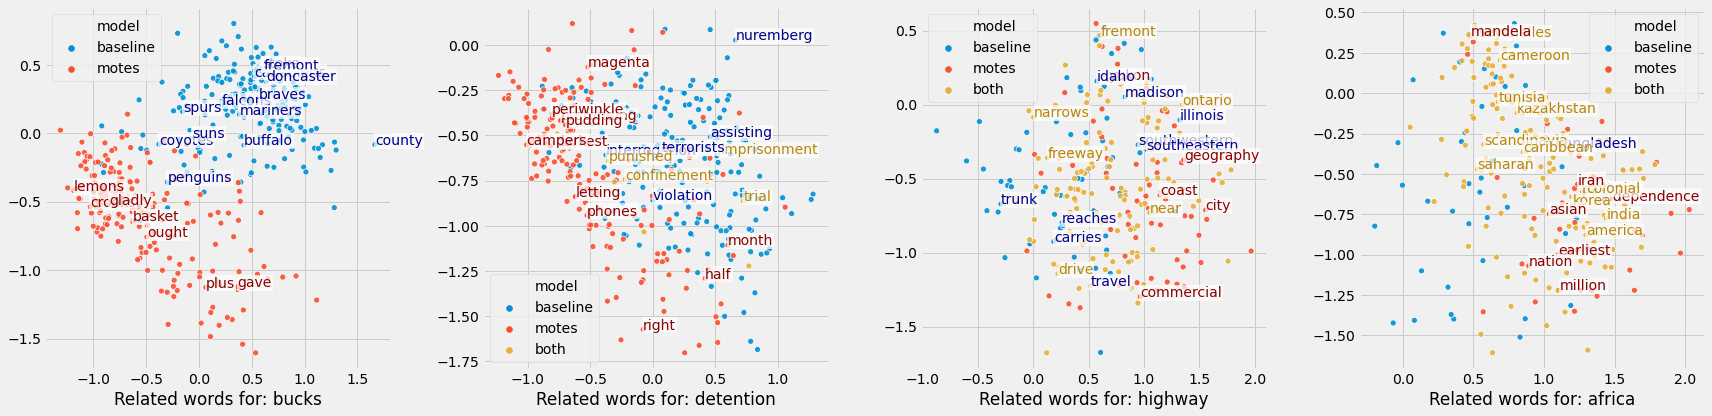

In [1209]:
qs = ['bucks', 'detention', 'highway', 'africa']
fig, axs = plt.subplots(1, len(qs), figsize=(6*len(qs), 6), sharey=False)
fig.tight_layout()

for q, ax in zip(qs, axs):
    q_vec = mc.target.get_vector(q)
    q_coord = pca.transform([q_vec])[0]

    all_words = mc.compare_nns(q, 200)
    vecs = np.vstack([mc.target.get_vector(word) for word in all_words['general']+all_words['child']+all_words['overlap']]) 

    pca_coords = pca.transform(vecs)
    coords = pd.DataFrame(pca_coords, index=all_words['general']+all_words['child']+all_words['overlap'])
    coords['model'] = ['baseline']*len(all_words['general']) + ['motes']*len(all_words['child']) + ['both']*len(all_words['overlap'])

    sns.scatterplot(x=coords[0], y=coords[1], hue=coords['model'], alpha=.9, ax=ax)
    #for word, data in coords.query('model=="baseline"').sample(10).iterrows():
    for word, data in coords.sample(20).iterrows():
        if data['model'] == 'baseline':
            c = 'darkblue'
        elif data['model'] == 'motes':
            c = 'darkred'
        else:
            c = 'darkgoldenrod'
        ax.text(data[0], data[1], word, color=c, bbox=dict(facecolor='white', edgecolor='none', pad=1, alpha=.7))
    #for word, data in coords.query('model=="motes"').sample(10).iterrows():
    #    ax.text(data[0], data[1], word, color='darkred')
    #for word, data in coords.query('model=="both"').sample(1).iterrows():
    #    ax.text(data[0], data[1], word, color='orange')
    ax.set_xlabel("Related words for: " + q)
    ax.set_ylabel('')
fig.tight_layout()

In [1079]:
mc.print_compare_nns('memo')

=============Words similar to 'memo'==============
Just General Language
 memorandum, leaked, requesting, stating, emails, telegram, statements, criticizing, apology, fbi, twitter, cia, notified, document, documents, hoax, apologized, submitted, complaint, consult, reports, stated, responded, watergate, reply, announcing, inquiry, confidential, comments, testimony, hiss, quoted, blog, reviewing, desist, requested, complaining, interviewed, comment, booklet, statement, recommendation, concluding, impeachment, announcement, commenting, saying, posted, countered, letter, contacted, anonymous, lengthy, diary, complied, confirms, wrote, circulated, report, announce, quoting, allegations, petitions, told, proposing, testified, investigation, informed, questioning, accusing, prosecutor, email, pamphlet, discussing, asking, facebook, reporters, pollard, inform, forthcoming, dated, request, plea, commented, intelligence, transcript, interview, disclosed, quotes, nixon, announces, reviewed, warn

In [1091]:
sorted_scores.tail(20).sample(10)

islands         0.711
socialist       0.711
border          0.716
organization    0.720
downtown        0.714
railway         0.715
election        0.718
president       0.727
technology      0.712
ethnic          0.717
dtype: float64

In [993]:
mc.target.most_similar(focus.index)

[('way', 0.6260727047920227),
 ('shove', 0.6238744258880615),
 ('ought', 0.6206240057945251),
 ('know', 0.6168725490570068),
 ('complain', 0.6140812039375305),
 ('dragging', 0.6133253574371338),
 ('right', 0.6125357151031494),
 ('staring', 0.6121552586555481),
 ('think', 0.610654354095459),
 ('time', 0.6105718612670898)]

In [991]:
mc.target.most_similar(mc.compare_nns('separatists')['general'])

[('germans', 0.6713840365409851),
 ('troops', 0.6578837633132935),
 ('soldiers', 0.6444967985153198),
 ('forces', 0.6444104313850403),
 ('war', 0.6145105361938477),
 ('fled', 0.6122846603393555),
 ('fought', 0.6044290065765381),
 ('army', 0.5985451936721802),
 ('led', 0.5932230353355408),
 ('armies', 0.5872802138328552)]

In [992]:
mc.baseline.most_similar(mc.compare_nns('separatists')['child'])

[('foolishness', 0.7857933640480042),
 ('dryly', 0.7719596028327942),
 ('gossiping', 0.759192168712616),
 ('bobbed', 0.7483322620391846),
 ('hitched', 0.745141327381134),
 ('toothache', 0.7374557256698608),
 ('sneeze', 0.7300778031349182),
 ('sullen', 0.7269558310508728),
 ('sifted', 0.7232385873794556),
 ('languid', 0.7125718593597412)]

In [1252]:
mc = modeling.ModelCompare('/data/motes/models/all_weighted_3_model_100k.kv',
                  '/data/motes/models/enwiki_317k_100k.kv')
boring_names = mc.target.most_similar('boring', topn=100000)


[]

In [1295]:
boring_names = mc.target.most_similar(['boring'], ['surprising'], topn=5000)
[n for n,w in boring_names if n in names.tolist()[:2000]]

['flora',
 'samara',
 'olga',
 'adele',
 'patty',
 'kareem',
 'britney',
 'junior',
 'devon',
 'steven',
 'kyra',
 'margaret',
 'corbin',
 'isla',
 'guy',
 'gideon',
 'connie',
 'alexandra',
 'josephine',
 'gloria',
 'carlie',
 'joann',
 'daphne',
 'trinity',
 'lilian',
 'barrett',
 'tomas',
 'susanna',
 'geneva',
 'patricia',
 'london',
 'octavia',
 'elaine',
 'virgil',
 'mona',
 'xander',
 'dave',
 'milton',
 'sherri',
 'cassie',
 'diana',
 'porter',
 'dulce',
 'tabitha',
 'don',
 'rick',
 'margarita',
 'harvey',
 'nora',
 'ellis',
 'tristan',
 'milo',
 'willis',
 'dorothea',
 'santiago',
 'wilma',
 'leola',
 'deja']

In [ ]:
boring_names = mc.target.most_similar

In [1287]:
boring_names[:10]

[('611', 0.5755944848060608),
 ('661', 0.5159481167793274),
 ('4-0', 0.509392261505127),
 ('102nd', 0.5071520805358887),
 ('week-long', 0.5046420693397522),
 ('.47', 0.5037480592727661),
 ('960', 0.501911461353302),
 ('561', 0.5009297728538513),
 ('-12', 0.4997255206108093),
 ('twenty-year', 0.49883633852005005)]

In [1260]:
len(names)

31862

In [1278]:
'sally' iin names

False

In [1279]:
names

0          james
1           john
2         robert
3        michael
4        william
          ...   
31857     saidah
31858      saher
31859      andhy
31860     masiya
31861       shin
Name: name, Length: 31862, dtype: object